In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p scipy,sklearn,numpy

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
CPython 2.7.12
IPython 5.1.0

scipy 0.18.1
sklearn 0.18.1
numpy 1.12.0

compiler   : GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)
system     : Darwin
release    : 16.4.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [2]:
# visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [3]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [4]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
history = model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, verbose=0)

In [5]:
# list all data in history
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


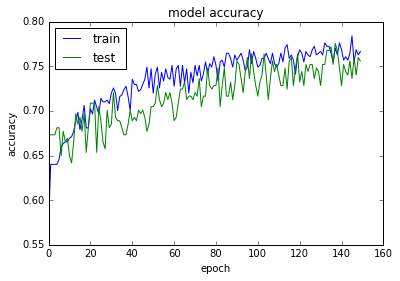

In [6]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

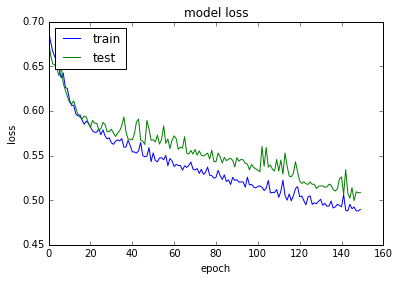

In [7]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

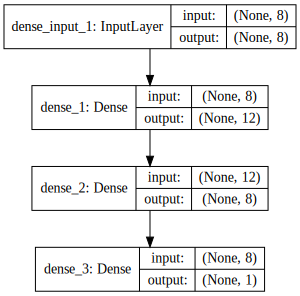

In [11]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))